In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
Data=pd.read_excel("Reliance ltd1.xlsx")
Data

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES
0,2015-01-01,438.57,441.87,437.93,439.84,181432,7338
1,2015-01-02,440.21,443.78,437.83,438.62,260835,9740
2,2015-01-05,438.60,441.25,433.52,434.41,328788,19270
3,2015-01-06,431.89,431.89,412.13,414.11,975422,39864
4,2015-01-07,415.40,425.35,414.65,423.67,660342,26226
...,...,...,...,...,...,...,...
1970,2022-12-21,2622.00,2633.60,2576.35,2584.40,77509,8722
1971,2022-12-22,2595.20,2606.65,2565.90,2577.90,93106,9175
1972,2022-12-23,2564.00,2589.75,2493.00,2501.55,307147,38425
1973,2022-12-26,2513.70,2542.05,2493.95,2524.50,95382,7874


<AxesSubplot:>

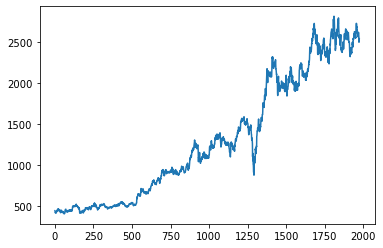

In [3]:
Data.CLOSE.plot()

In [4]:
Train=Data.tail(1727)
Test=Data.head(248)

In [5]:
Train

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES
248,2016-01-01,500.24,505.19,499.62,502.89,328595,6141
249,2016-01-04,498.26,502.32,488.99,493.01,273627,8604
250,2016-01-05,496.28,500.24,493.72,497.81,294671,5588
251,2016-01-06,497.76,514.11,495.56,511.11,949981,31274
252,2016-01-07,507.07,508.95,499.37,501.01,374543,9578
...,...,...,...,...,...,...,...
1970,2022-12-21,2622.00,2633.60,2576.35,2584.40,77509,8722
1971,2022-12-22,2595.20,2606.65,2565.90,2577.90,93106,9175
1972,2022-12-23,2564.00,2589.75,2493.00,2501.55,307147,38425
1973,2022-12-26,2513.70,2542.05,2493.95,2524.50,95382,7874


In [6]:
Test

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES
0,2015-01-01,438.57,441.87,437.93,439.84,181432,7338
1,2015-01-02,440.21,443.78,437.83,438.62,260835,9740
2,2015-01-05,438.60,441.25,433.52,434.41,328788,19270
3,2015-01-06,431.89,431.89,412.13,414.11,975422,39864
4,2015-01-07,415.40,425.35,414.65,423.67,660342,26226
...,...,...,...,...,...,...,...
243,2015-12-24,498.01,499.25,493.35,495.73,146409,5043
244,2015-12-28,497.27,502.00,495.78,499.52,291670,7068
245,2015-12-29,501.72,504.45,499.00,502.79,248983,6346
246,2015-12-30,503.06,503.70,496.33,497.69,103873,3532


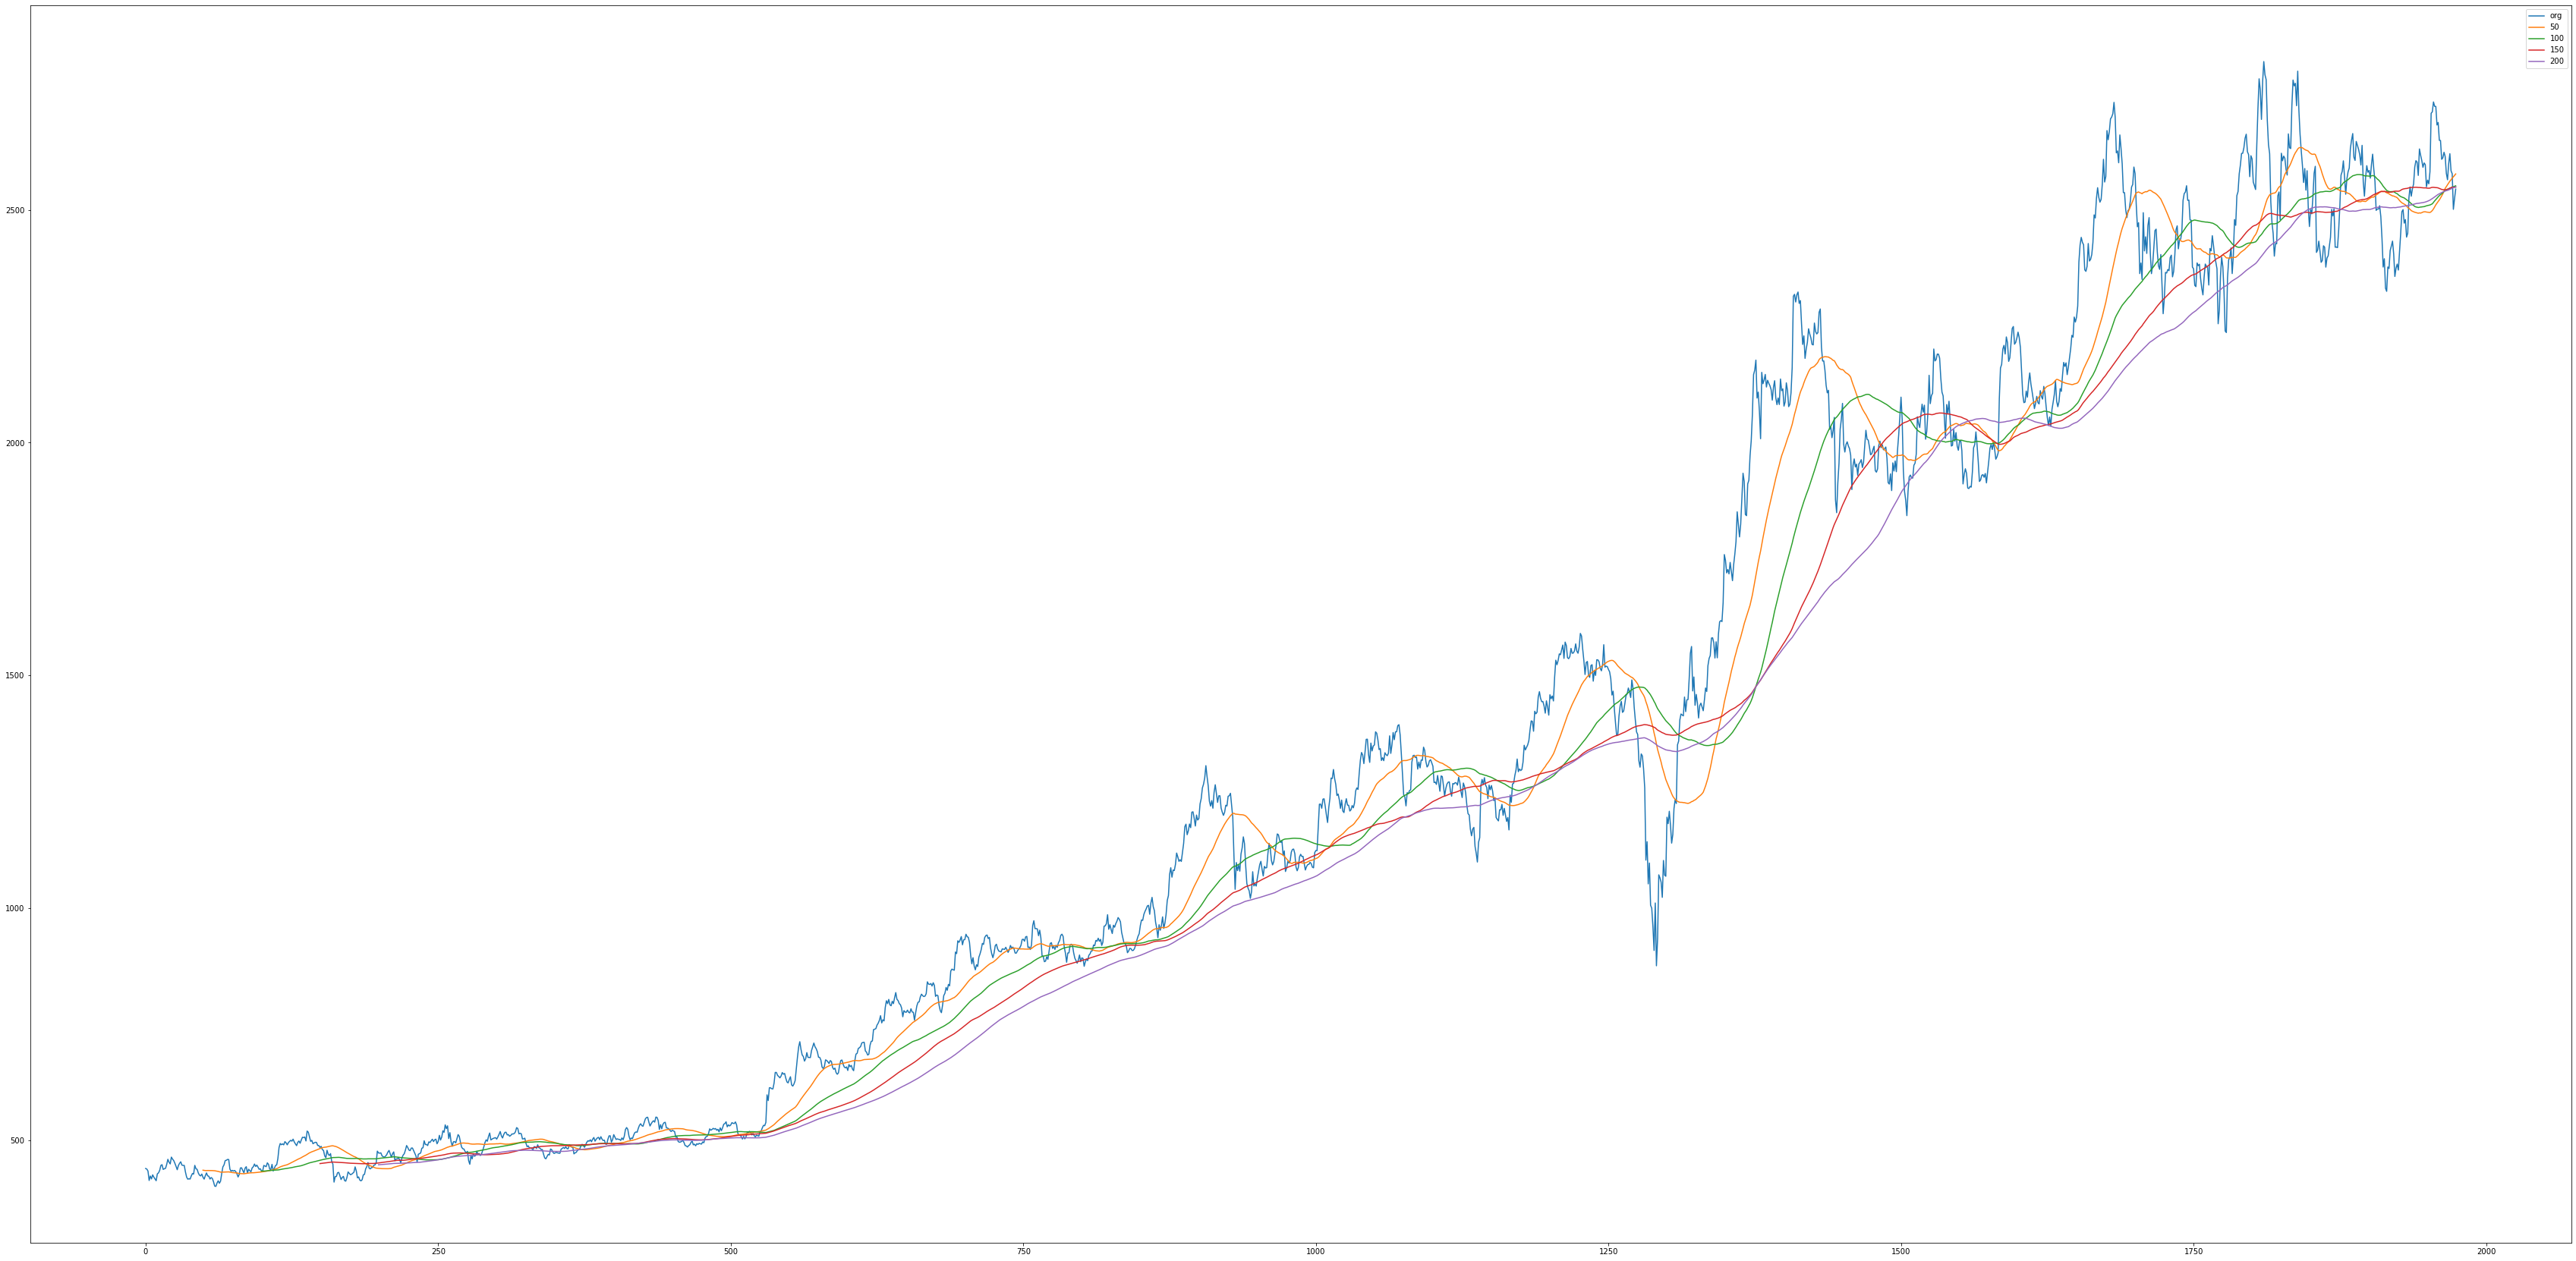

In [7]:
plt.figure(figsize=(60,30))
Data.CLOSE.plot(label="org")
for i in range(50,201,50):
    Data["CLOSE"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<Figure size 2160x1080 with 0 Axes>

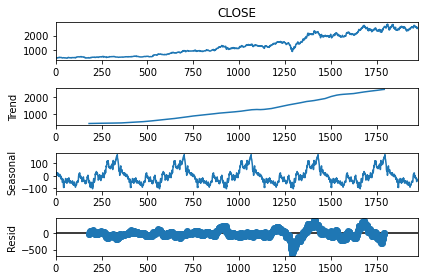

In [8]:
plt.figure(figsize=(30,15))
decompose_ts_add = seasonal_decompose(Data.CLOSE,period=365)
decompose_ts_add.plot()
plt.show() 

C:\Users\somes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


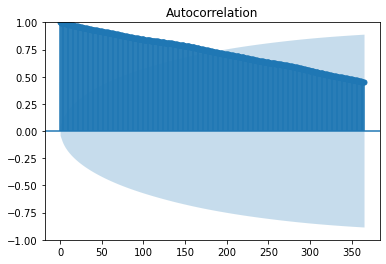

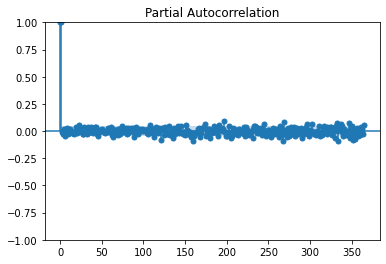

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Data.CLOSE,lags=365)
tsa_plots.plot_pacf(Data.CLOSE,lags=365)
plt.show() 

In [10]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

In [11]:
Train["CLOSE"] = Train["CLOSE"].astype('double') 
ses_model = SimpleExpSmoothing(Train["CLOSE"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.CLOSE) 

C:\Users\somes\AppData\Local\Temp\ipykernel_22088\773197280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["CLOSE"] = Train["CLOSE"].astype('double')


nan

In [12]:
# Holt method 
hw_model = Holt(Train["CLOSE"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.CLOSE)  

C:\Users\somes\AppData\Local\Temp\ipykernel_22088\1696759705.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["CLOSE"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


nan

In [13]:
hwe_model_add_add = ExponentialSmoothing(Train["CLOSE"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.CLOSE) 

nan

In [14]:
hwe_model_mul_add = ExponentialSmoothing(Train["CLOSE"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.CLOSE) 

nan

In [15]:
Data["CLOSE"] = Data["CLOSE"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(Data["CLOSE"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [16]:
#Forecasting for next 30 time periods
hwe_model_mul_add.forecast(30)

1975    2540.910624
1976    2544.959086
1977    2545.849344
1978    2544.163074
1979    2545.038442
1980    2540.095623
1981    2546.584357
1982    2546.251968
1983    2553.301706
1984    2548.707534
1985    2552.700488
1986    2556.756253
1987    2553.280951
1988    2557.344099
1989    2558.233667
1990    2556.534178
1991    2557.408790
1992    2552.436947
1993    2558.952200
1994    2558.613194
1995    2565.692144
1996    2561.070678
1997    2565.077998
1998    2569.148421
1999    2565.651279
2000    2569.729111
2001    2570.617989
2002    2568.905283
2003    2569.779139
2004    2564.778272
dtype: float64